# Synthetic data generation

In [1]:
import os
import warnings
import pandas as pd

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Load data

In [2]:
data = pd.read_csv('data/testing_datasets/sweden_motor_insurance/sweden_motor_insurance.csv')
data.head(10)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
5,1,1,1,6,477.66,57,170913
6,1,1,1,7,105.58,23,56940
7,1,1,1,8,32.55,14,77487
8,1,1,1,9,9998.46,1704,6805992
9,1,1,2,1,314.58,45,214011


In [3]:
len(data)

2182

## Train model and generate synthetic data

In [4]:
from sklearn.model_selection import train_test_split
from synthesized.core import BasicSynthesizer

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3138-2D31-322D-B531
Expires at: 2018-12-31 00:00:00


In [5]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [6]:
with BasicSynthesizer(data=data) as synthesizer:
    synthesizer.learn(data=train, num_iterations=20000)
    synthesized = synthesizer.synthesize(n=10000)

value types:
Kilometres categorical
Zone categorical
Bonus categorical
Make categorical-similarity
Insured continuous
Claims continuous-integer
Payment continuous-integer


## Display synthetic data

In [7]:
synthesized.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,3,6,4,3,58.928837,1,88
1,5,7,5,4,13.143636,0,13
2,5,7,4,3,19.917978,0,0
3,5,7,2,4,3.906395,0,0
4,3,1,1,5,91.139503,29,100


In [8]:
data.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


## Demonstrate the utility of synthetic data 

In [9]:
from synthesized.testing import UtilityTesting
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [10]:
testing = UtilityTesting(synthesizer, train, test, synthesized)

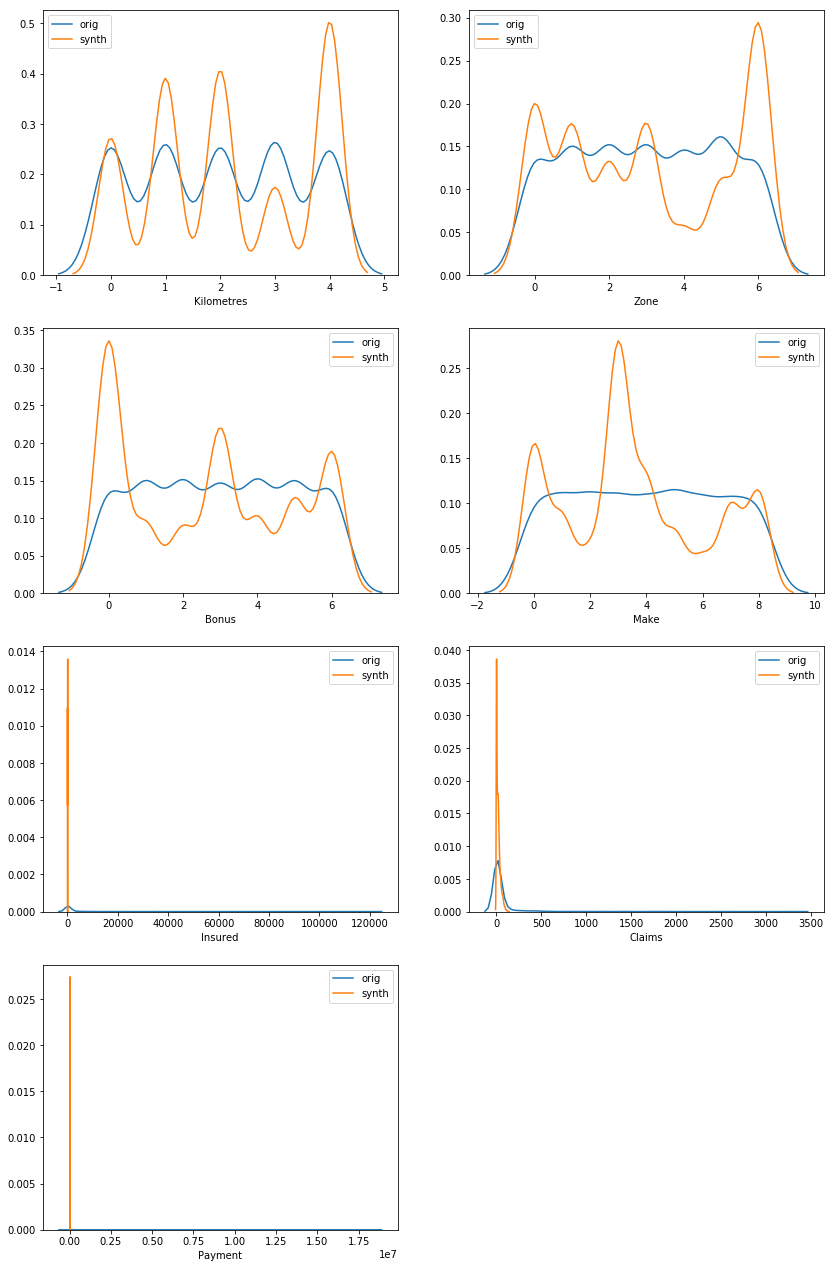

In [11]:
testing.show_distributions()

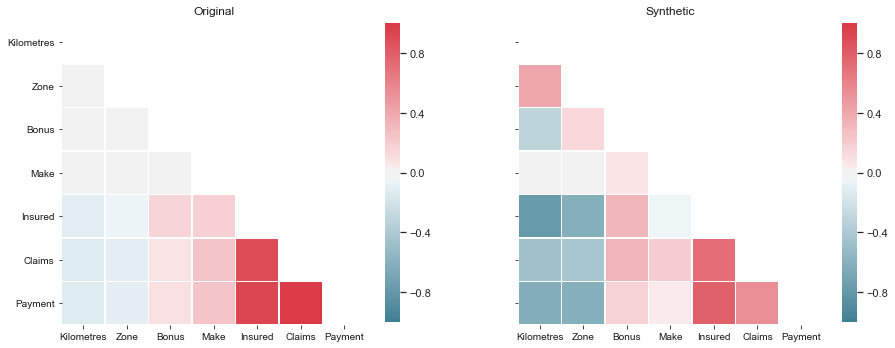

In [12]:
testing.show_corr_matrices()

## Demonstrate the utility for training ML models

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

testing.utility(target='Claims', regressor=GradientBoostingRegressor())

RMSE (orig): 17.41304526333704
RMSE (synth): 233.23854272486747


## Final dataset

In [14]:
synthesized.head(30)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,3,6,4,3,58.928837,1,88
1,5,7,5,4,13.143636,0,13
2,5,7,4,3,19.917978,0,0
3,5,7,2,4,3.906395,0,0
4,3,1,1,5,91.139503,29,100
5,5,7,1,8,24.754919,12,38
6,3,3,1,1,99.339226,24,103
7,3,3,7,1,93.078148,73,103
8,5,7,4,4,12.124255,0,0
9,5,3,1,5,60.617058,21,93
